In [3]:
import statsmodels.api as sm
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly
import warnings

pio.renderers.default = "plotly_mimetype+notebook_connected"
warnings.filterwarnings('ignore')

In [4]:
n_assets = 5
n_sim = 500

returns = np.random.randn(n_assets, n_sim)

rand = np.random.rand(n_assets)
weights = rand/sum(rand)

### <center> Returns </center>

Markowitz (1952) proposed an intuitive and appealing solution to the long-standing issue of ambiguity in portfolio selection. He suggested that investors should choose portfolios that maximize expected return for a given level of risk, or equivalently, minimize risk for a given level of expected return. The set of portfolios that satisfy this condition is called the efficient frontier. The efficient frontier is a parabola when the risk-free rate is positive, and a straight line when the risk-free rate is zero. The efficient frontier is the set of portfolios that have the minimum variance for a given level of expected return. The efficient frontier is the set of portfolios that have the maximum expected return for a given level of variance. The efficient frontier is the set of portfolios that have the maximum expected return for a given level of variance. The efficient frontier is the set of portfolios that have the maximum expected return for a given level of variance. The efficient frontier is the set of portfolios that have the maximum expected return for a given level of variance. The efficient frontier is the set of portfolios that have the maximum expected return for a given level of variance. The efficient frontier is the set of portfolios that have the maximum expected return for a given level of variance. The efficient frontier is the set of portfolios that have the maximum expected return for a given level of variance. The efficient frontier is the set of portfolios that have the maximum expected return for a given level of variance. The efficient frontier is the set of portfolios that have the maximum expected return for a given level of variance. The efficient frontier is the set of portfolios that have the maximum expected return for a given level of variance. The efficient frontier is the set of portfolios that have the maximum expected return for a given level of variance.

$$ \sigma = \sqrt{\mathbb{E}(R^2) - [\mathbb{E}(R)]^2} $$

where R and $\mathbb{E}$ refer to annual return and expectation, respectively. $\mathbb{E}$ as the expected return represents the return of interest. This is because it is probabiliity we are talking about in defining risk. When it comes to portfolio variance, covariance comes into the picture, and the formula is:

$$ \sigma_{p}^2 = w_{a}^2\sigma_{a}^2 + w_{b}^2\sigma_{b}^2 + 2w_{a}w_{b}Cov(r_{a}, r_{b}) $$

where w is the weight and $\sigma^2$ is variance, and Cov is covariance matrix.

Taking the square root of the variance obtained produces the portfolio standard deviation:

$$ \sigma_{p} = \sqrt{\sigma_{p}^2} $$

In other words, portfolio expected return is a weighted average of the individual returns and can be shown as:

$$ \mathbb{E}(R) = \Sigma_{i}^{n}w_{i}R_{i} = w_{1}R_{1} + w_{2}R_{2} + ... + w_{n}R_{n} $$

where n is the number of assets in the portfolio, $w_{i}$ is the weight of the ith asset, and $R_{i}$ is the return of the ith asset.


In [5]:
def port_return(returns):
	rets = np.mean(returns, axis = 1)
	cov = np.cov(rets.T, aweights=weights, ddof=1)
	portfolio_returns = np.dot(weights, rets.T)
	portfolio_std_dev = np.sqrt(np.dot(weights, np.dot(cov, weights)))
	return portfolio_returns, portfolio_std_dev

In [7]:
portfolio_returns, portfolio_std_dev = port_return(returns)

In [8]:
print(portfolio_returns)
print(portfolio_std_dev)

-0.006304772940002163
0.009870932222301806


In [9]:
portfolio = np.array([port_return(np.random.randn(n_assets, i)) for i in range(1, 101)])

In [11]:
best_fit = sm.OLS(portfolio[:, 1], sm.add_constant(portfolio[:, 0])).fit().fittedvalues

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(name = 'Risk-Return Relationship',
                         x = portfolio[:, 0], y = portfolio[:, 1], mode = 'markers'))
fig.add_trace(go.Scatter(name = 'Best Fit Line', x = portfolio[:, 0], y = best_fit, mode = 'lines'))
fig.update_layout(xaxis_title = 'Return', yaxis_title = 'Standard Deviation', width = 900, height = 470)
fig.show()

Adverse selection is a type of asymmetric information in which one party tries to exploit its informational advantage. This arises when sellers are better informed than buyers. This phenomenon was perfectly coined by Akerlof (1978) as “the Markets for Lemons.”
Within this framework, “lemons” refer to low-quality commodities. Consider a market with lemons and high-quality cars, and buyers know that they’re likely to buy a lemon, which lowers the equilibrium price.
However, the seller is bet‐ ter informed whether the car is a lemon or of high quality.
So, in this situation, bene‐ fit from exchange might disappear, and no transaction takes place.
Because of its complexity and opaqueness, the mortgage market in the pre-crisis era is a good example of adverse selection.
Borrowers knew more about their willingness and ability to pay than lenders.
Financial risk was created through the securitizations of the loans (i.e., mortgage-backed securities). From that point on, the originators of the mortgage loans knew more about the risks than those who were selling them to investors in the form of mortgage-backed securities.

Lets model adverse selection, suppose the consumer utility function is:
$$ U(x) = e^{\gamma x} $$

<center> Where x is income and $\gamma$ is a parameter, which takes on values (0, 1). </center>

---
---
>>### Note: The utility function is a tool used to represent consumer preferences for goods and services, and it is concave for risk-averse individuals.
---
---



In [14]:
import seaborn as sns; sns.set_style('whitegrid')

def utility(x):
	return (np.exp(x**gamma))


pi = np.random.uniform(0, 1, 20)
pi = np.sort(pi)

print(f'The highest three probability of losses are {pi[-3:]}')

The highest three probability of losses are [0.80597659 0.847267   0.99904857]


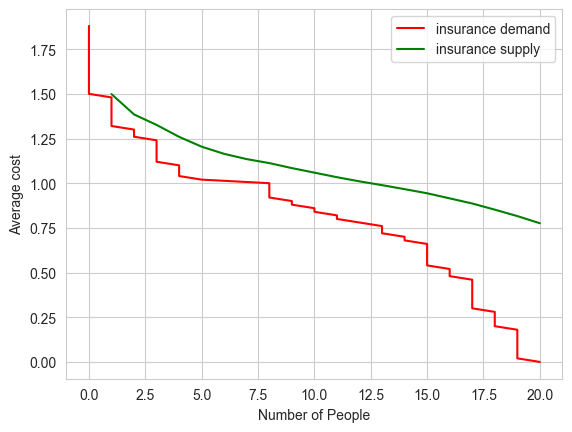

In [16]:
y = 2
c = 1.5
Q = 5
D = 0.01
gamma = 0.4

def supply(Q):
	return (np.mean(pi[-Q:]) * c)


def demand(D):
    return (np.sum(utility(y - D) > pi * utility(y - c) + (1 - pi) * utility(y)))

plt.figure()
plt.plot([demand(i) for i in np.arange(0, 1.9, 0.02)], np.arange(0, 1.9, 0.02), 'r', label = 'insurance demand')
plt.plot(range(1, 21), [supply(j) for j in range(1, 21)], 'g', label = 'insurance supply')
plt.ylabel('Average cost')
plt.xlabel('Number of People')
plt.legend()
plt.show()